# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [2]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 4.6495146135450103, performing 13.8 it/sec
Step 100: Loss = 0.0108042750840942, performing 3.5 it/sec
No improvement since Step 108, early stopping.
[Best]  Step 107: Loss = 0.0041756346170776
[Final] Step 157: Loss = 0.0054129232259054

predicted end states
------------------------------------
         5th       Mean      95th
TBOP-1  3.70e-01  3.70e-01  3.70e-01
TBOP-2  3.04e-09  3.10e-09  3.17e-09
TBOP-3  1.19e-08  1.19e-08  1.20e-08
TBOP-4  2.01e-06  2.01e-06  2.01e-06


predicted conditional events
----------------------------------
       5th       Mean      95th
TBOP  1.00e+00  1.00e+00  1.00e+00
MRSS  5.45e-06  5.45e-06  5.45e-06
DHRS  3.21e-08  3.22e-08  3.24e-08
DHRL  8.23e-09  8.39e-09  8.56e-09




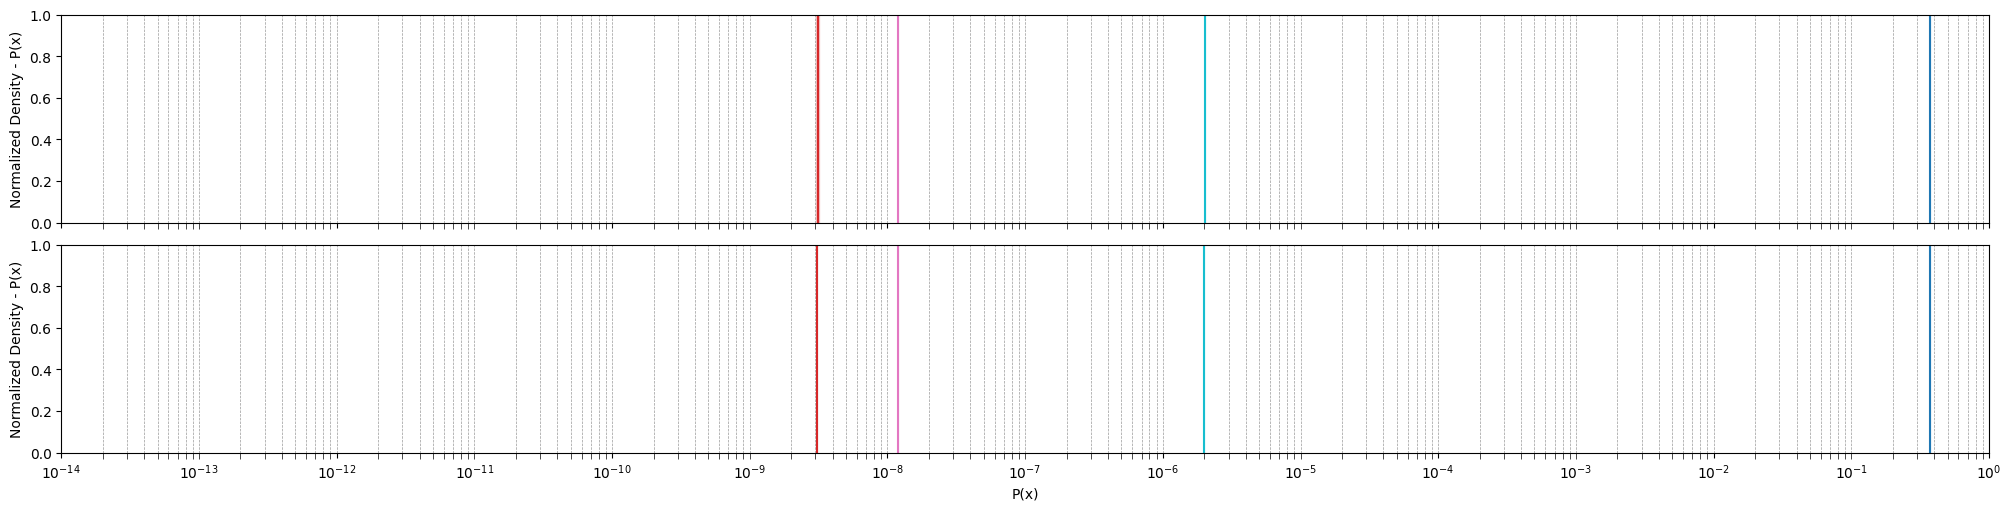

In [ ]:
tunable = {
 'num_samples': 1000000,      # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 3.7e-1,  # set the initiating event (IE) frequency here
 'freeze_initiating_event': True,       # set to False if you'd like to predict the IE frequency as well
}

conditional_events = {
    'names': ['TBOP', 'MRSS', 'DHRS', 'DHRL'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'TBOP-1': {
        'sequence': [1, 0, 0, 0],
        'probability': 3.7e-1,
    },
    'TBOP-2': {
        'sequence': [1, 0, 0, 1],
        'probability': 3.1e-9,
    },
    'TBOP-3': {
        'sequence': [1, 0, 1, np.nan],
        'probability': 1.2e-8,
    },
    'TBOP-4': {
        'sequence': [1, 1, np.nan, np.nan],
        'probability': 2.0e-6,
    },
    # 'TBOP-0': {
    #     'sequence': [0, np.nan, np.nan, np.nan],
    #     'probability': 1.0 - 3.7e-1 - 3.1e-9 - 1.2e-8 - 2.00e-6, # one minus all the other end-states
    # },
}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)